In [51]:
from sklearn.datasets import fetch_openml, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [52]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [53]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[0]
    L = -(1/m) * L_sum

    return L

In [54]:
iris = load_iris()

X = iris.data
y = iris.target

In [55]:
X,y = shuffle(X,y)

In [56]:
digits = 3
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [57]:
m = 120
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [58]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 0.1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  343.21474131002526
Epoch 100 cost:  8.791833505571116
Epoch 200 cost:  6.996677352801008
Epoch 300 cost:  5.956875653645658
Epoch 400 cost:  5.249018282504266
Epoch 500 cost:  4.732221826808485
Epoch 600 cost:  4.349300878173393
Epoch 700 cost:  4.065117561103295
Epoch 800 cost:  3.8465697754630925
Epoch 900 cost:  3.672100245727994
Epoch 1000 cost:  3.5291799023522783
Epoch 1100 cost:  3.409785806001877
Epoch 1200 cost:  3.308400503369447
Epoch 1300 cost:  3.2210620452316707
Epoch 1400 cost:  3.1448443459006157
Epoch 1500 cost:  3.077547520261341
Epoch 1600 cost:  3.017505065396057
Epoch 1700 cost:  2.9634586953286144
Epoch 1800 cost:  2.9144659706718743
Epoch 1900 cost:  2.869814952537764
Final cost: 2.8293331941451463


In [59]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

In [65]:
predictions

array([1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1,
       2, 0, 2, 1, 0, 1, 2, 1])

In [67]:
cf_matrix = confusion_matrix(predictions, labels)
print(cf_matrix)

[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]


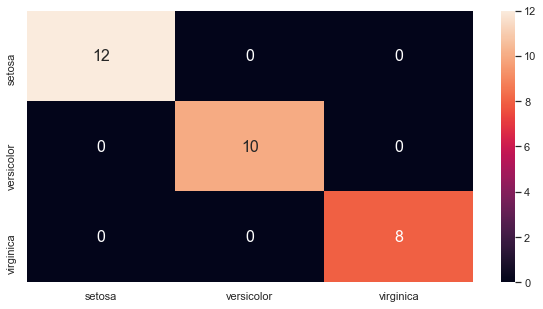

In [69]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [10,5]
label = list(iris.target_names)
df_cm = pd.DataFrame(cf_matrix, label, label)
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size":16})
plt.show()

In [70]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

